In [14]:
# K-means Clustering for Diabetes Prediction Dataset
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Set plotting style
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 8)

In [16]:
# Load the dataset
print("Loading dataset...")
df = pd.read_csv(r'C:\Course\diabetes\data\diabetes_prediction_dataset.csv')

Loading dataset...


In [17]:
# Display basic information about the dataset
print("\nDataset Information:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())


Dataset Information:
Shape: (100000, 9)

First 5 rows:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [18]:
print("\nColumn Information:")
display(df.info())


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


None

In [19]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [20]:
# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [21]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")


Number of duplicate rows: 3854
Duplicates removed. New shape: (96146, 9)



Target Variable Distribution:


diabetes
0    87664
1     8482
Name: count, dtype: int64

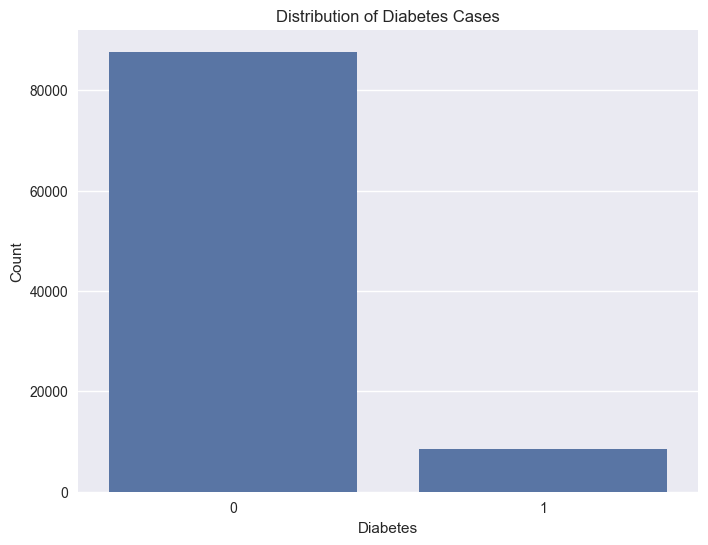

In [22]:
# Explore the target variable
print("\nTarget Variable Distribution:")
display(df['diabetes'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

In [23]:
# Data Preprocessing
print("\nData Preprocessing...")


Data Preprocessing...


In [24]:
# Handle categorical variables
print("Converting categorical variables to numeric...")
# Convert gender to numeric
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})

Converting categorical variables to numeric...


In [25]:
# One-hot encode smoking_history
smoking_dummies = pd.get_dummies(df['smoking_history'], prefix='smoking')
df = pd.concat([df, smoking_dummies], axis=1)
df.drop('smoking_history', axis=1, inplace=True)

In [26]:
# Check for any remaining categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print(f"Remaining categorical columns: {categorical_columns}")
else:
    print("All columns are now numeric.")

All columns are now numeric.


In [27]:
# Display the preprocessed dataset
print("\nPreprocessed Dataset:")
display(df.head())


Preprocessed Dataset:


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,True,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,False,True,False,False,False,False


In [28]:
# Data Scaling
print("\nScaling the data...")
# Select features for clustering
X = df.drop('diabetes', axis=1)
y = df['diabetes']


Scaling the data...


In [29]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Dimensionality reduction for visualization
print("\nApplying PCA for visualization...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


Applying PCA for visualization...


In [31]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'diabetes': y
})

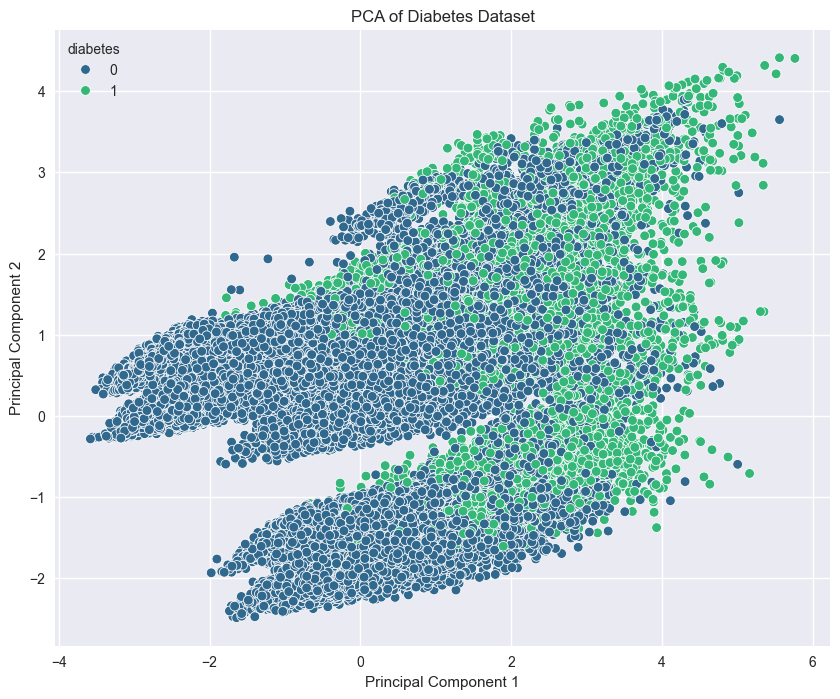

In [32]:
# Visualize the data after PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='diabetes', data=pca_df, palette='viridis')
plt.title('PCA of Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [33]:
# Determine optimal number of clusters using Elbow Method
print("\nDetermining optimal number of clusters using Elbow Method...")
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette_score(X_scaled, kmeans.labels_):.4f}")


Determining optimal number of clusters using Elbow Method...
K=2: Inertia=1094016.12, Silhouette Score=0.1372
K=3: Inertia=966264.64, Silhouette Score=0.1915
K=4: Inertia=859530.16, Silhouette Score=0.2379
K=5: Inertia=753718.44, Silhouette Score=0.2788
K=6: Inertia=652238.43, Silhouette Score=0.3123
K=7: Inertia=580233.83, Silhouette Score=0.3279
K=8: Inertia=529517.10, Silhouette Score=0.3356
K=9: Inertia=491696.36, Silhouette Score=0.2941
K=10: Inertia=469281.28, Silhouette Score=0.2767


Text(0, 0.5, 'Inertia')

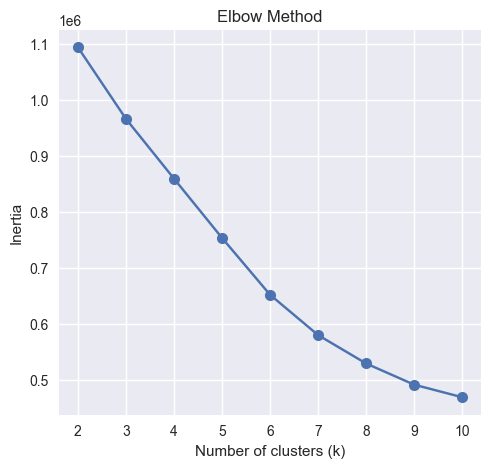

In [34]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.grid(True)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

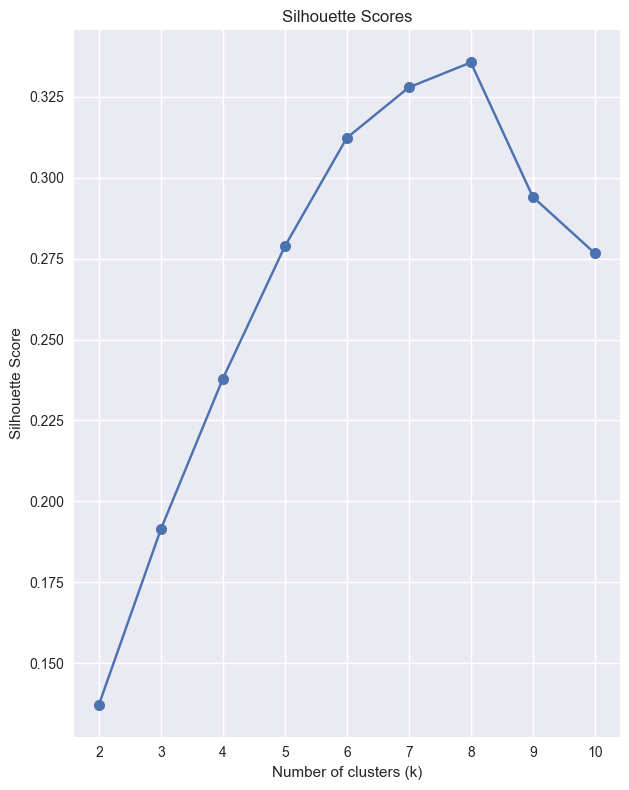

In [35]:
# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.grid(True)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [36]:
# Choose optimal k (you can adjust this based on the elbow method and silhouette score)
optimal_k = 3  # This will be determined from the plots above
print(f"\nSelected optimal number of clusters: {optimal_k}")


Selected optimal number of clusters: 3


In [37]:
# Train the K-means model with the optimal number of clusters
print("\nTraining K-means model...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_


Training K-means model...


In [38]:
# Add cluster labels to the original dataframe
df['cluster'] = cluster_labels

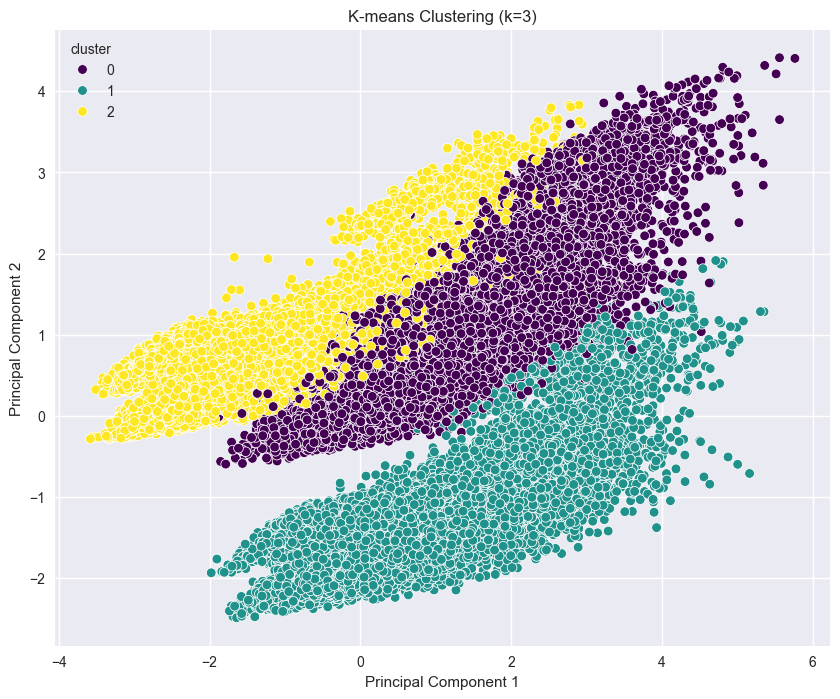

In [39]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'cluster': cluster_labels
}), palette='viridis')
plt.title(f'K-means Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [40]:
# Analyze clusters in relation to diabetes
print("\nAnalyzing clusters in relation to diabetes...")
cluster_diabetes = pd.crosstab(df['cluster'], df['diabetes'])
display(cluster_diabetes)


Analyzing clusters in relation to diabetes...


diabetes,0,1
cluster,,
0,25168,3707
1,31061,3337
2,31435,1438


In [41]:
# Calculate percentage of diabetes cases in each cluster
cluster_diabetes_pct = pd.crosstab(df['cluster'], df['diabetes'], normalize='index') * 100
display(cluster_diabetes_pct)

diabetes,0,1
cluster,,
0,87.161905,12.838095
1,90.298855,9.701145
2,95.625589,4.374411


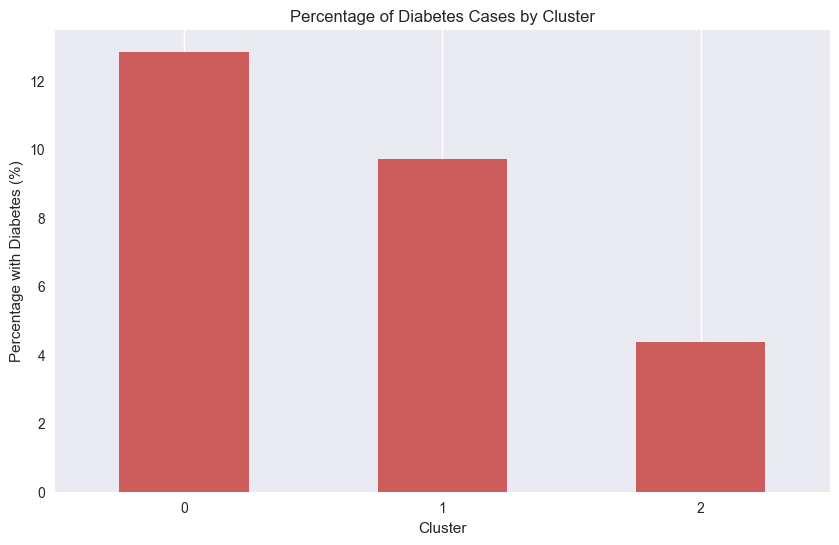

In [42]:
# Visualize diabetes percentage by cluster
plt.figure(figsize=(10, 6))
cluster_diabetes_pct[1].plot(kind='bar', color='indianred')
plt.title('Percentage of Diabetes Cases by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage with Diabetes (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [43]:
# Analyze cluster characteristics
print("\nCluster Characteristics:")
cluster_analysis = df.groupby('cluster').mean()
display(cluster_analysis)


Cluster Characteristics:


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
cluster,,,,,,,,,,,,,,
0,0.451048,49.756724,0.106701,0.066771,28.838446,5.592648,140.771359,0.128381,0.000485,0.318511,0.138459,0.322043,0.0,0.220502
1,0.350660,43.877373,0.092854,0.031862,28.121183,5.545503,138.806471,0.097011,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
2,0.453777,32.620630,0.036078,0.027348,25.152150,5.466380,135.360083,0.043744,1.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [44]:
# Visualize feature means by cluster
plt.figure(figsize=(14, 10))
features = X.columns
cluster_means = []

for i in range(optimal_k):
    cluster_means.append(df[df['cluster'] == i][features].mean())

cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(optimal_k)])
display(cluster_means_df)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
Cluster 0,0.451048,49.756724,0.106701,0.066771,28.838446,5.592648,140.771359,0.000485,0.318511,0.138459,0.322043,0.0,0.220502
Cluster 1,0.350660,43.877373,0.092854,0.031862,28.121183,5.545503,138.806471,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
Cluster 2,0.453777,32.620630,0.036078,0.027348,25.152150,5.466380,135.360083,1.000000,0.000000,0.000000,0.000000,0.0,0.000000


<Figure size 1400x1000 with 0 Axes>

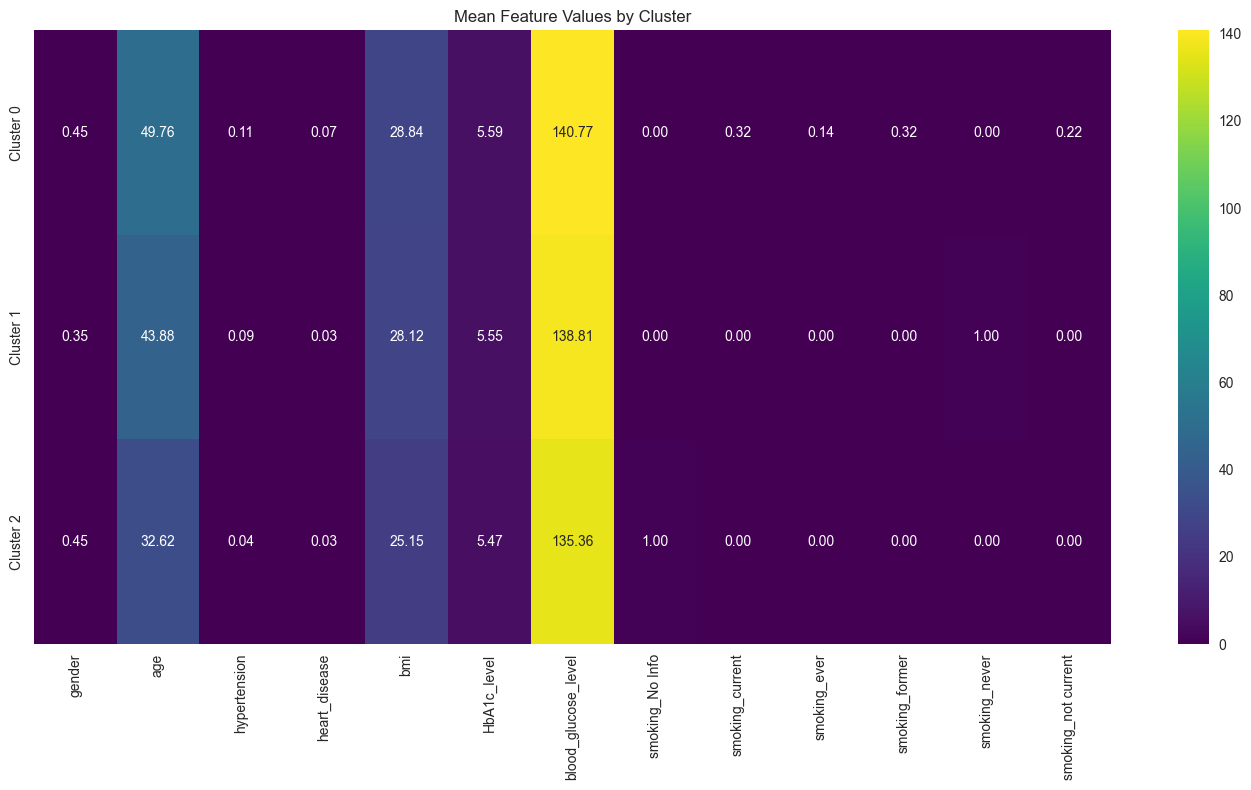

In [45]:
# Create a heatmap of feature means by cluster
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means_df, annot=True, cmap='viridis', fmt='.2f')
plt.title('Mean Feature Values by Cluster')
plt.tight_layout()
plt.show()

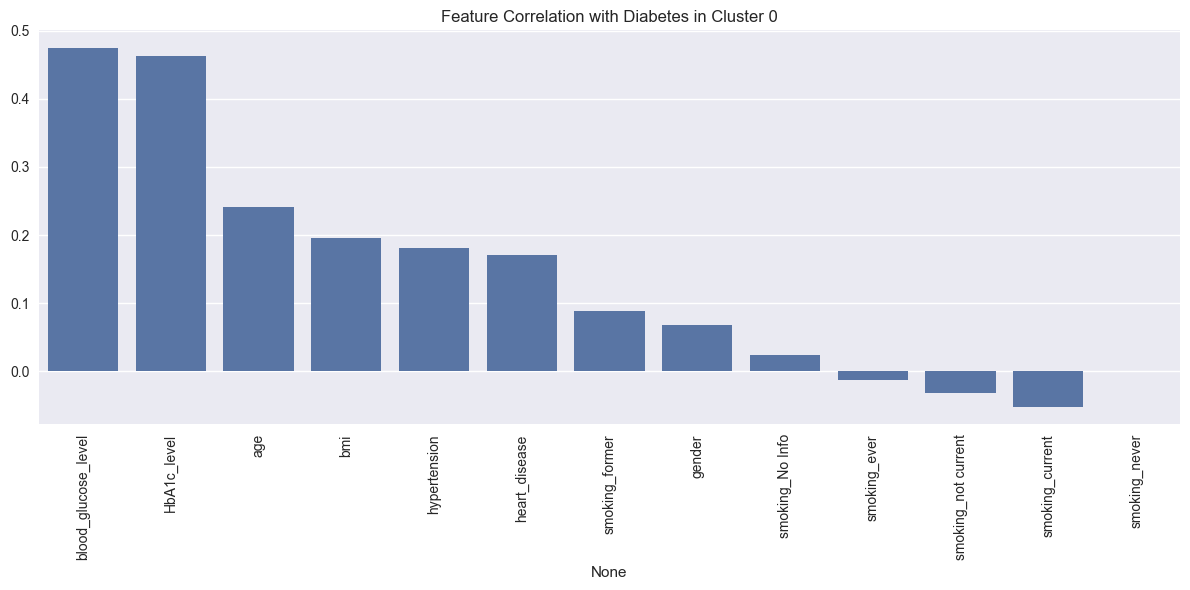

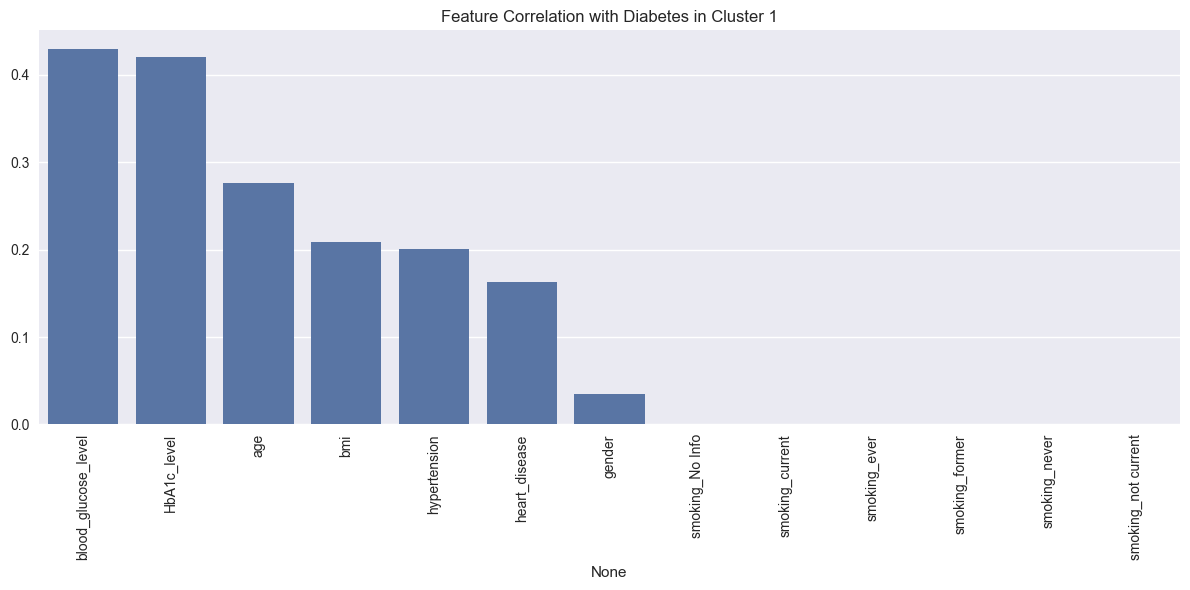

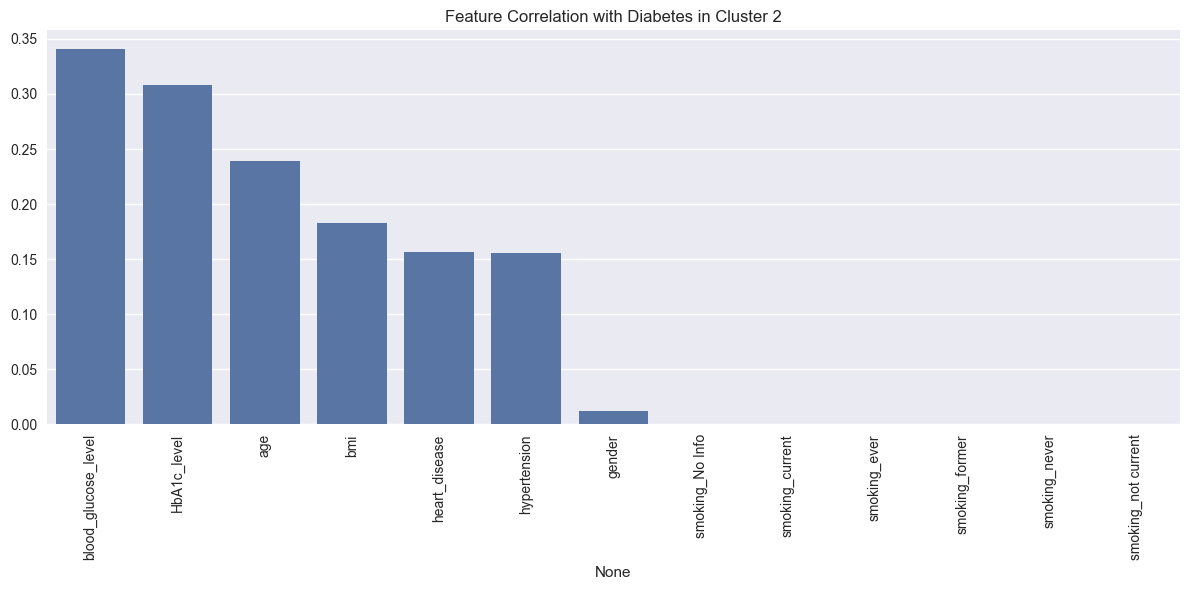

In [46]:
# Feature importance in each cluster
for i in range(optimal_k):
    plt.figure(figsize=(12, 6))
    cluster_data = df[df['cluster'] == i]
    
    # Correlation with diabetes in this cluster
    corr = cluster_data.corr()['diabetes'].sort_values(ascending=False)
    corr = corr.drop(['diabetes', 'cluster'])
    
    sns.barplot(x=corr.index, y=corr.values)
    plt.title(f'Feature Correlation with Diabetes in Cluster {i}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [47]:
# Save the model and scaler
print("\nSaving the model and scaler...")
model_data = {
    'kmeans_model': kmeans,
    'scaler': scaler,
    'pca': pca,
    'optimal_k': optimal_k,
    'feature_names': list(X.columns)
}

with open('diabetes_kmeans_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("\nModel saved successfully as 'diabetes_kmeans_model.pkl'")


Saving the model and scaler...

Model saved successfully as 'diabetes_kmeans_model.pkl'


In [48]:
# Function to predict cluster for new data
def predict_cluster(new_data):
    """
    Predict the cluster for new data.
    
    Parameters:
    new_data (DataFrame): New data with the same features as the training data
    
    Returns:
    int: Predicted cluster
    """
    # Make sure the columns match the training data
    required_columns = model_data['feature_names']
    missing_columns = set(required_columns) - set(new_data.columns)
    
    if missing_columns:
        raise ValueError(f"Missing columns in input data: {missing_columns}")

    # Use only the required columns in the correct order
    new_data = new_data[required_columns]
    
    # Scale the data
    scaled_data = model_data['scaler'].transform(new_data)
    
    # Predict the cluster
    cluster = model_data['kmeans_model'].predict(scaled_data)
    
    return cluster

In [49]:
# Example usage of the prediction function
print("\nExample of using the model for prediction:")
# Create a sample input (you would replace this with actual data)
sample_input = pd.DataFrame({
    'gender': [1],  # Male
    'age': [45],
    'hypertension': [0],
    'heart_disease': [0],
    'bmi': [28.5],
    'HbA1c_level': [6.2],
    'blood_glucose_level': [140],
    'smoking_current': [0],
    'smoking_ever': [1],
    'smoking_former': [0],
    'smoking_never': [0],
    'smoking_not current': [0]
})


Example of using the model for prediction:


In [50]:
# Check if we have all necessary columns
missing_cols = set(X.columns) - set(sample_input.columns)
for col in missing_cols:
    sample_input[col] = 0

# Make sure columns are in the same order
sample_input = sample_input[X.columns]

# Predict the cluster
predicted_cluster = kmeans.predict(scaler.transform(sample_input))
print(f"Predicted cluster for the sample input: {predicted_cluster[0]}")

print("\nK-means Clustering analysis completed successfully!")

Predicted cluster for the sample input: 0

K-means Clustering analysis completed successfully!


In [51]:
print("\n\n=== EVALUATION METRICS ===\n")

# Map clusters to predicted diabetes label (0 or 1)
# We'll map each cluster to the majority class within that cluster
cluster_to_label = {}
for cluster in range(optimal_k):
    # Count diabetes cases in this cluster
    cluster_df = df[df['cluster'] == cluster]
    diabetes_count = cluster_df['diabetes'].sum()
    total_count = len(cluster_df)
    
    # If majority have diabetes, map cluster to 1, otherwise 0
    if diabetes_count > total_count / 2:
        cluster_to_label[cluster] = 1
    else:
        cluster_to_label[cluster] = 0



=== EVALUATION METRICS ===



In [52]:
print("Cluster to predicted label mapping:")
for cluster, label in cluster_to_label.items():
    print(f"Cluster {cluster} → {'Diabetic' if label == 1 else 'Non-diabetic'}")

Cluster to predicted label mapping:
Cluster 0 → Non-diabetic
Cluster 1 → Non-diabetic
Cluster 2 → Non-diabetic


In [53]:
# Create predicted labels based on cluster membership
df['predicted_diabetes'] = df['cluster'].map(cluster_to_label)

# Calculate accuracy
accuracy = accuracy_score(df['diabetes'], df['predicted_diabetes'])
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.9118


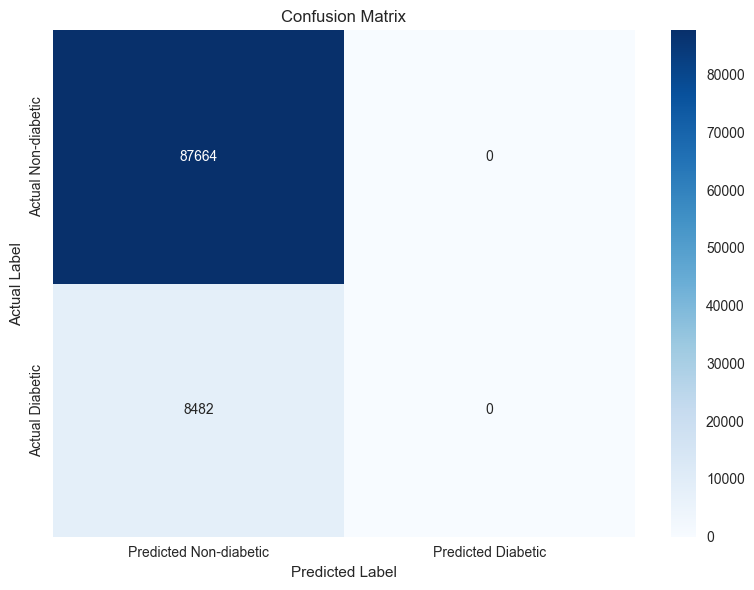

In [54]:
# Confusion Matrix
conf_matrix = confusion_matrix(df['diabetes'], df['predicted_diabetes'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-diabetic', 'Actual Diabetic'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [55]:
# Classification Report
print("\nClassification Report:")
print(classification_report(df['diabetes'], df['predicted_diabetes']))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     87664
           1       0.00      0.00      0.00      8482

    accuracy                           0.91     96146
   macro avg       0.46      0.50      0.48     96146
weighted avg       0.83      0.91      0.87     96146



In [57]:
# Evaluate cluster validity with statistical tests
print("\n=== CLUSTER VALIDITY ANALYSIS ===")

# Calculate silhouette score for the clusters
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

sil_score = silhouette_score(X_scaled, df['cluster'])
db_score = davies_bouldin_score(X_scaled, df['cluster'])
ch_score = calinski_harabasz_score(X_scaled, df['cluster'])

print(f"Silhouette Score: {sil_score:.4f} (Higher is better, range: -1 to 1)")
print(f"Davies-Bouldin Score: {db_score:.4f} (Lower is better)")
print(f"Calinski-Harabasz Score: {ch_score:.4f} (Higher is better)")


=== CLUSTER VALIDITY ANALYSIS ===
Silhouette Score: 0.1915 (Higher is better, range: -1 to 1)
Davies-Bouldin Score: 2.2471 (Lower is better)
Calinski-Harabasz Score: 14110.7112 (Higher is better)


<Figure size 1200x600 with 0 Axes>

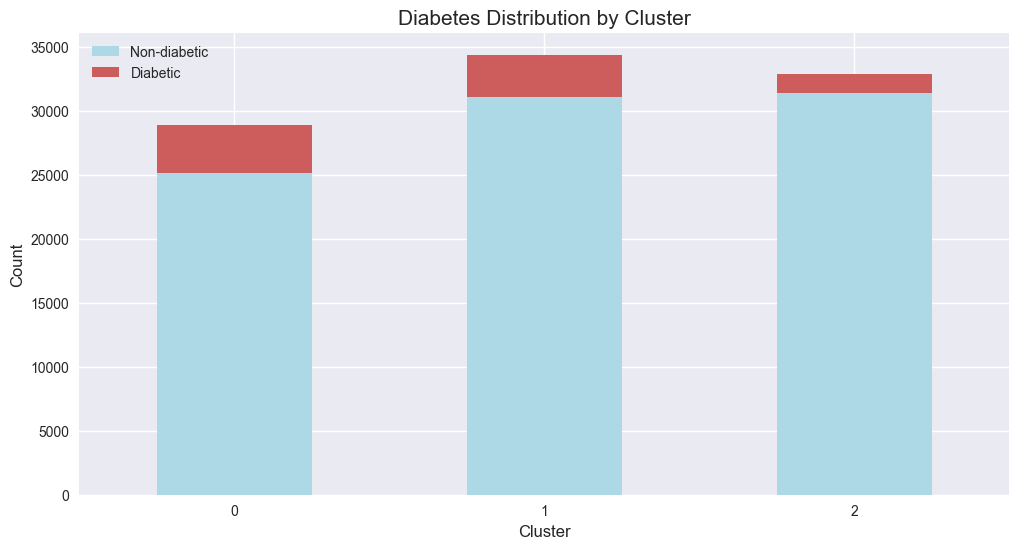

In [61]:
# Visualize diabetes prevalence in each cluster with a more detailed plot
plt.figure(figsize=(12, 6))
cluster_sizes = df['cluster'].value_counts().sort_index()

# Get diabetes counts by cluster
diabetes_by_cluster = df.groupby('cluster')['diabetes'].value_counts().unstack().fillna(0)
if 1 not in diabetes_by_cluster.columns:
    diabetes_by_cluster[1] = 0
if 0 not in diabetes_by_cluster.columns:
    diabetes_by_cluster[0] = 0

# Calculate percentages
diabetes_pct = diabetes_by_cluster.copy()
for cluster in diabetes_pct.index:
    total = diabetes_by_cluster.loc[cluster, 0] + diabetes_by_cluster.loc[cluster, 1]
    diabetes_pct.loc[cluster, 0] = (diabetes_by_cluster.loc[cluster, 0] / total) * 100
    diabetes_pct.loc[cluster, 1] = (diabetes_by_cluster.loc[cluster, 1] / total) * 100

# Create stacked bar chart
ax = diabetes_by_cluster.plot(kind='bar', stacked=True, figsize=(12, 6), 
                              color=['lightblue', 'indianred'])
plt.title('Diabetes Distribution by Cluster', fontsize=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Non-diabetic', 'Diabetic'])

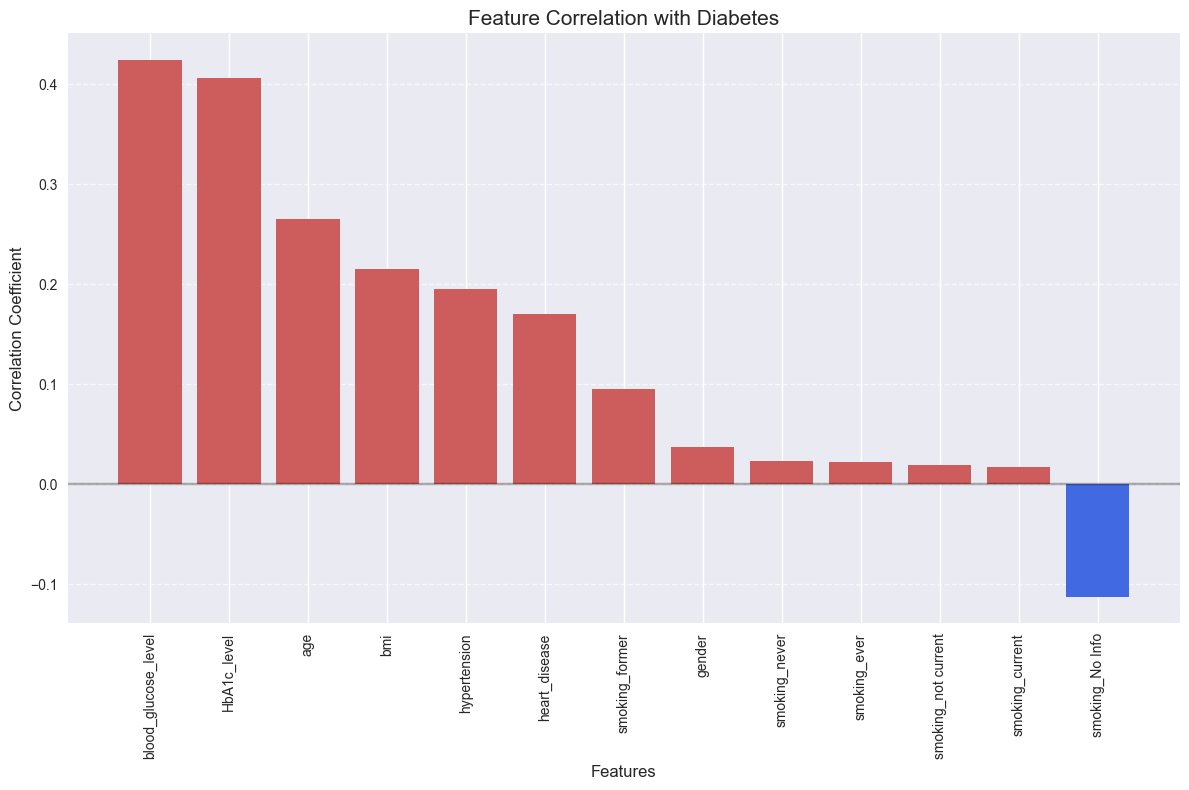

In [64]:
# Create a bar chart for feature correlations
plt.bar(range(len(correlations)), correlations, color=['indianred' if c > 0 else 'royalblue' for c in correlations])
plt.xticks(range(len(correlations)), features, rotation=90)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Feature Correlation with Diabetes', fontsize=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

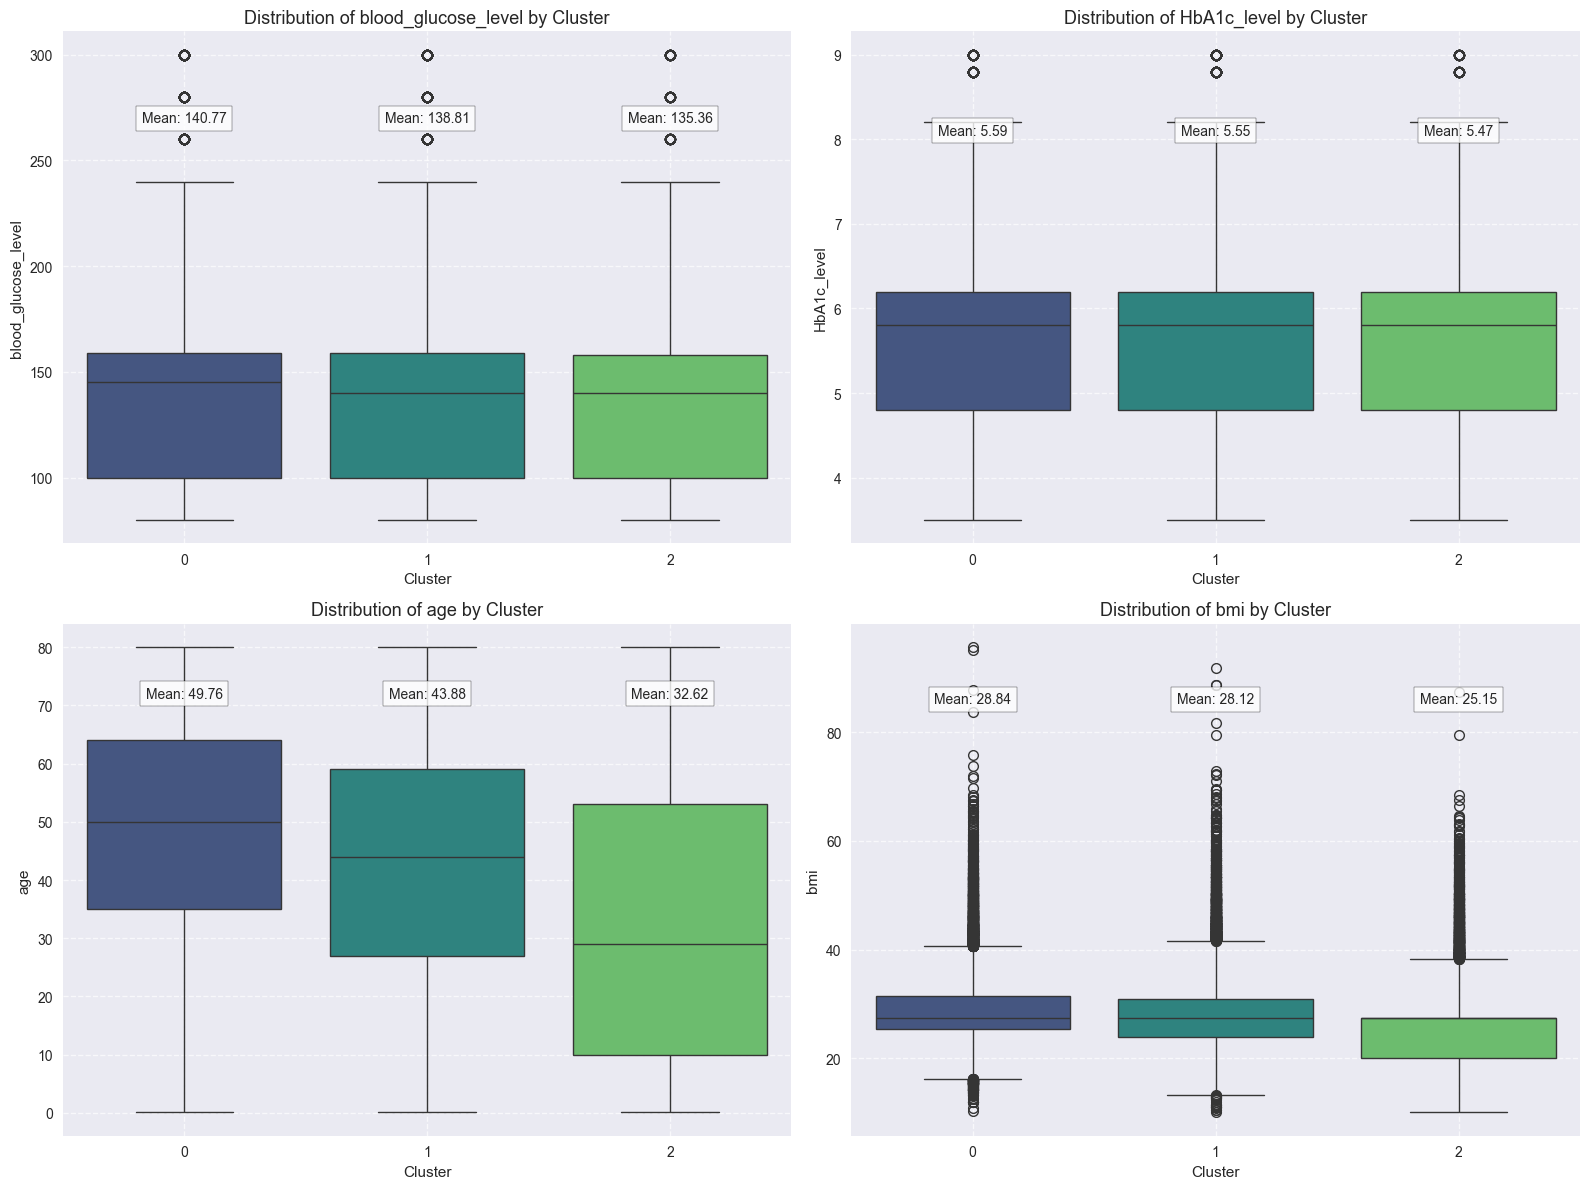

In [70]:
# Distribution of key features by cluster
# Select the top 4 most important features based on correlation
top_features = corr_with_diabetes.abs().sort_values(ascending=False).index[:4]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    if i >= 4:  # Limit to 4 features
        break
        
    sns.boxplot(x='cluster', y=feature, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {feature} by Cluster', fontsize=13)
    axes[i].set_xlabel('Cluster', fontsize=11)
    axes[i].set_ylabel(feature, fontsize=11)
    axes[i].grid(True, linestyle='--', alpha=0.7)

    # Add statistical annotation
    for cluster in range(optimal_k):
        # Calculate mean for this cluster
        cluster_mean = df[df['cluster'] == cluster][feature].mean()
        # Add text annotation for the mean
        axes[i].text(cluster, df[feature].max() * 0.9, 
                     f'Mean: {cluster_mean:.2f}', 
                     ha='center', va='center', 
                     bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()